In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

估算的渗透阈值：0.58765


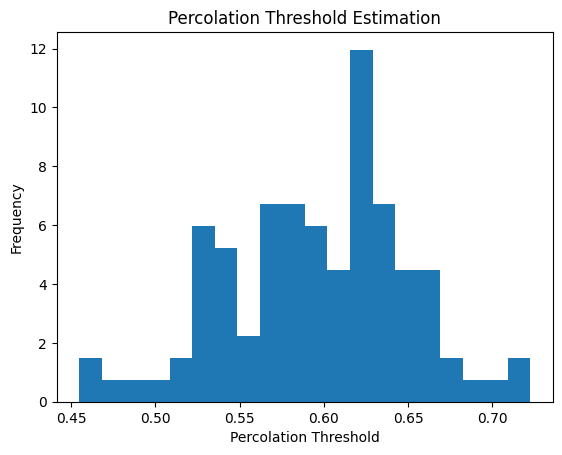

In [6]:


# 定义方向（上下左右）
DIRECTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def is_valid(x, y, n):
    """检查位置(x, y)是否在网格内"""
    return 0 <= x < n and 0 <= y < n

def dfs(grid, visited, x, y, n):
    """深度优先搜索，检查从(x, y)开始的开放路径是否能到达底部"""
    stack = [(x, y)]
    while stack:
        cx, cy = stack.pop()
        if visited[cx, cy]:
            continue
        visited[cx, cy] = True
        for dx, dy in DIRECTIONS:
            nx, ny = cx + dx, cy + dy
            if is_valid(nx, ny, n) and not visited[nx, ny] and grid[nx, ny] == 1:
                if nx == n - 1:  # 到达最底层
                    return True
                stack.append((nx, ny))
    return False

def percolates(grid, n):
    """判断网格是否渗透"""
    visited = np.zeros((n, n), dtype=bool)
    # 从顶部的每个开放站点开始搜索
    for col in range(n):
        if grid[0, col] == 1 and not visited[0, col]:
            if dfs(grid, visited, 0, col, n):
                return True
    return False

def monte_carlo_simulation(n):
    """进行蒙特卡洛模拟，估算渗透阈值"""
    grid = np.zeros((n, n), dtype=int)  # 网格初始化为封闭状态
    open_sites = 0
    while True:
        # 随机选择一个封闭站点并打开
        x, y = random.randint(0, n - 1), random.randint(0, n - 1)
        while grid[x, y] == 1:  # 保证站点是封闭的
            x, y = random.randint(0, n - 1), random.randint(0, n - 1)
        grid[x, y] = 1
        open_sites += 1
        
        # 判断是否渗透
        if percolates(grid, n):
            return open_sites / (n * n)  # 返回渗透时的开放站点比例

def estimate_percolation_threshold(n, trials):
    """通过多次实验估算渗透阈值"""
    thresholds = []
    for _ in range(trials):
        threshold = monte_carlo_simulation(n)
        thresholds.append(threshold)
    return np.mean(thresholds)

# 设置网格大小和实验次数
n = 20  # 网格大小 (20x20)
trials = 100  # 实验次数

# 进行蒙特卡洛模拟
estimated_threshold = estimate_percolation_threshold(n, trials)
print(f"估算的渗透阈值：{estimated_threshold}")

# 绘制渗透阈值的分布图
thresholds = [monte_carlo_simulation(n) for _ in range(trials)]
plt.hist(thresholds, bins=20, density=True)
plt.xlabel('Percolation Threshold')
plt.ylabel('Frequency')
plt.title('Percolation Threshold Estimation')
plt.show()
